# Explore here

In [2]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Podemos ver que en este caso en last_review tenemos 1000 valores que son nulos puesto que la mayoría de columnas tienen 48895 valores.

In [4]:
total_data.drop("host_id", axis = 1).duplicated().sum()

# Vemos cuantos duplicados hay de host_id que al final son los id de cada inmueble o cada persona que pone su vivienda en alquiler

np.int64(0)

In [5]:
total_data.drop(["reviews_per_month", "calculated_host_listings_count", "availability_365", "last_review","name"], axis = 1, inplace = True)

total_data.head()

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9
1,2595,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45
2,3647,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0
3,3831,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270
4,5022,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9


(0.0, 300.0)

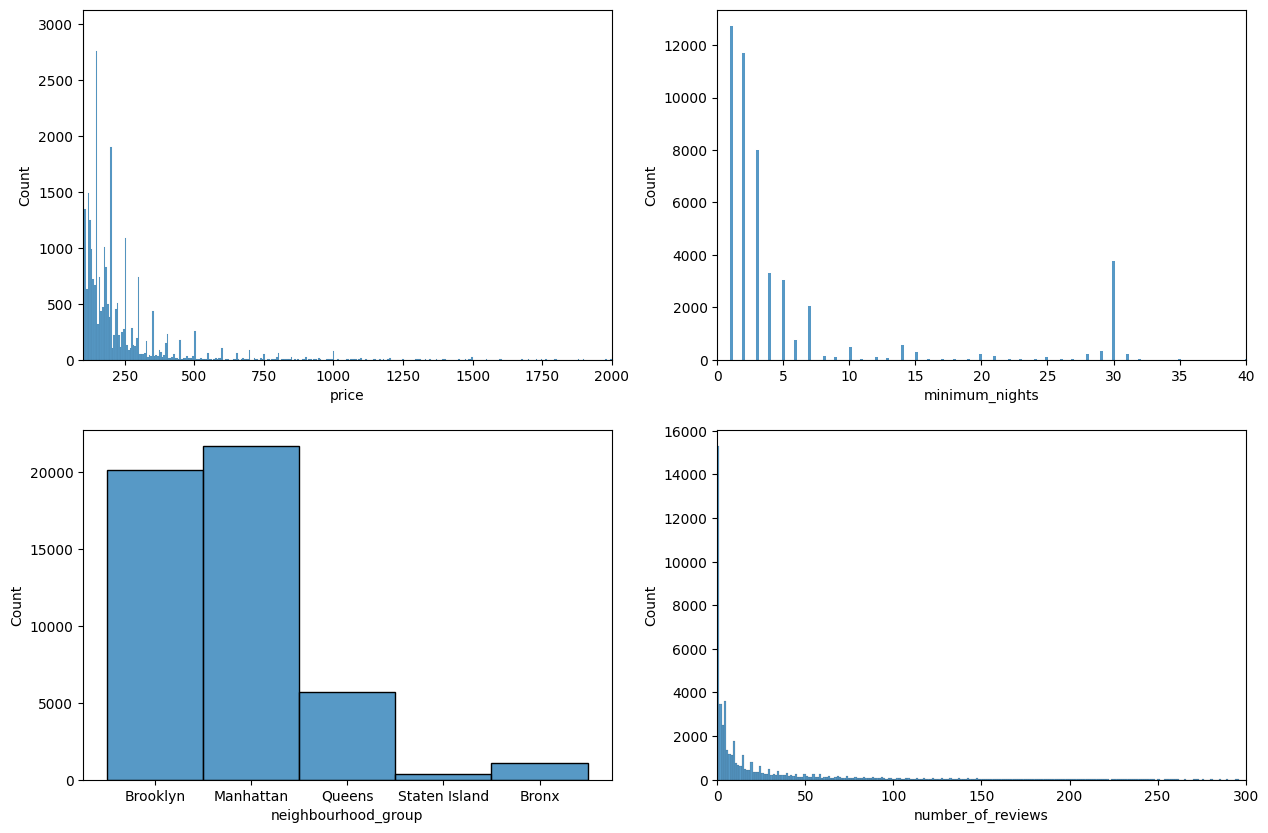

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.histplot(ax = axis[0,0], data = total_data, x = "price").set_xlim(100,2000)
sns.histplot(ax = axis[0,1], data = total_data, x = "minimum_nights").set_xlim(0,40)
sns.histplot(ax = axis[1,0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1,1], data = total_data, x = "number_of_reviews").set_xlim(0,300)

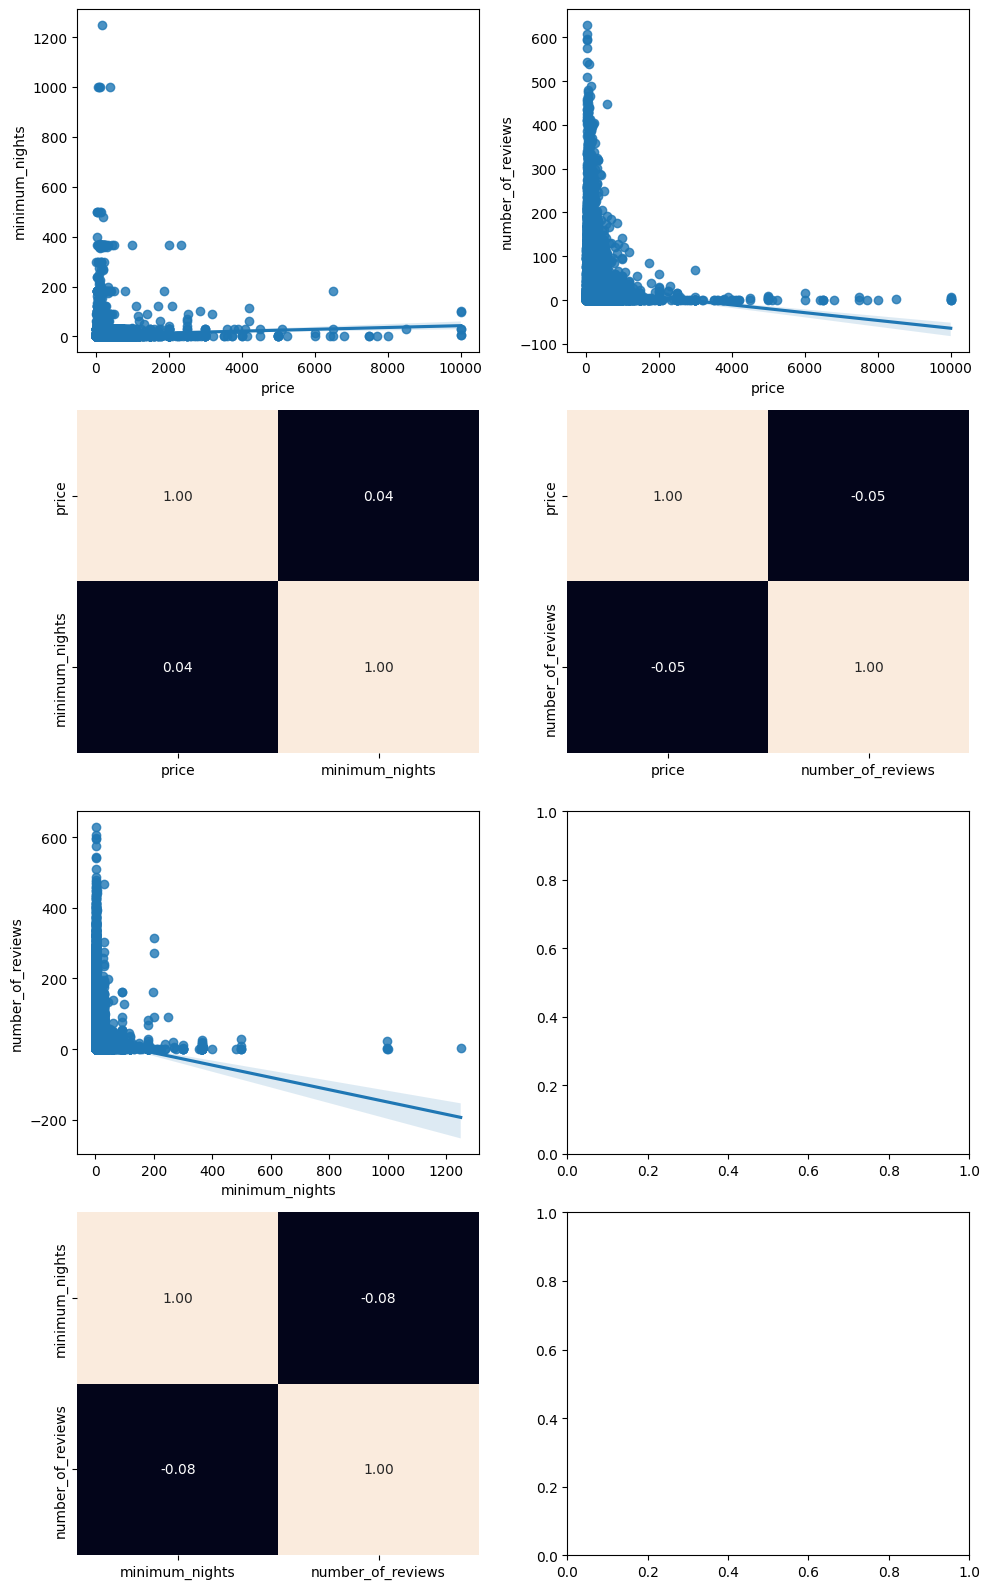

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0,0], data = total_data, x = "price", y = "minimum_nights")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0,1], data = total_data, x = "price", y = "number_of_reviews")
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2,0], data = total_data, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(total_data[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

plt.tight_layout()

plt.show()


Podemos ver que no hay ninguna relación ni entre el precio y las noches mínimas puesto que la correlación que hay es bastante amplia y tener un mínimo de noches no significa que vaya a costar más caro.
Por otra parte vemos que no hay una relación directa entre el precio y el número de reseñas. Este punto es sorprendente porque yo si pensaba que habría algún tipo de relación entre ellos puesto que muchas personas se dejan llevar por las reseñas que escriban otras.
Por último tenemos que tampoco hay mucha relación entre el número de noches mínimas y el número de reseñas, pensando que habría algo que ver ya que muchas veces se valora la atención de la persona que te alquila el apartamento o la habitación por como se comporta durante esos días, por lo que si son más días, es más atención que se le debe dar.

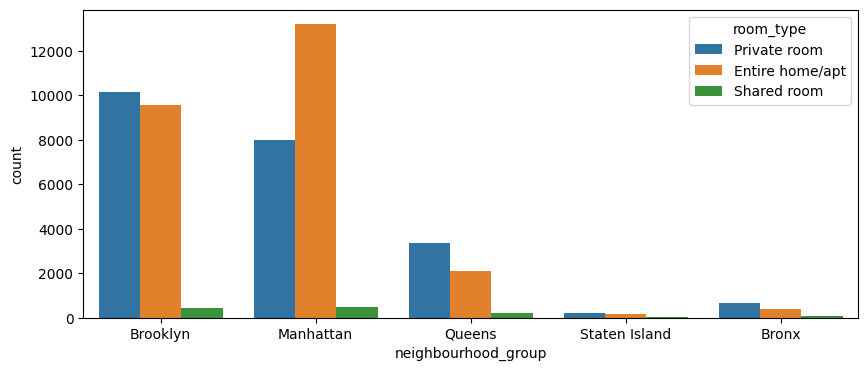

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 4))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")

plt.show()

Podemos ver como en este caso, en Manhattan lo que más se alquilan son apartamentos o casas enteras, mientras que en el resto de grupos de barrios se centran más en habitaciones privadas. En Brooklyn por ejemplo podemos ver que las habitaciones privadas y el alquiler de un apartamento entero están prácticamente a la par. Por último, las habitaciones compartidas no tienen tanto éxito como los otros tipos de habitaciones.

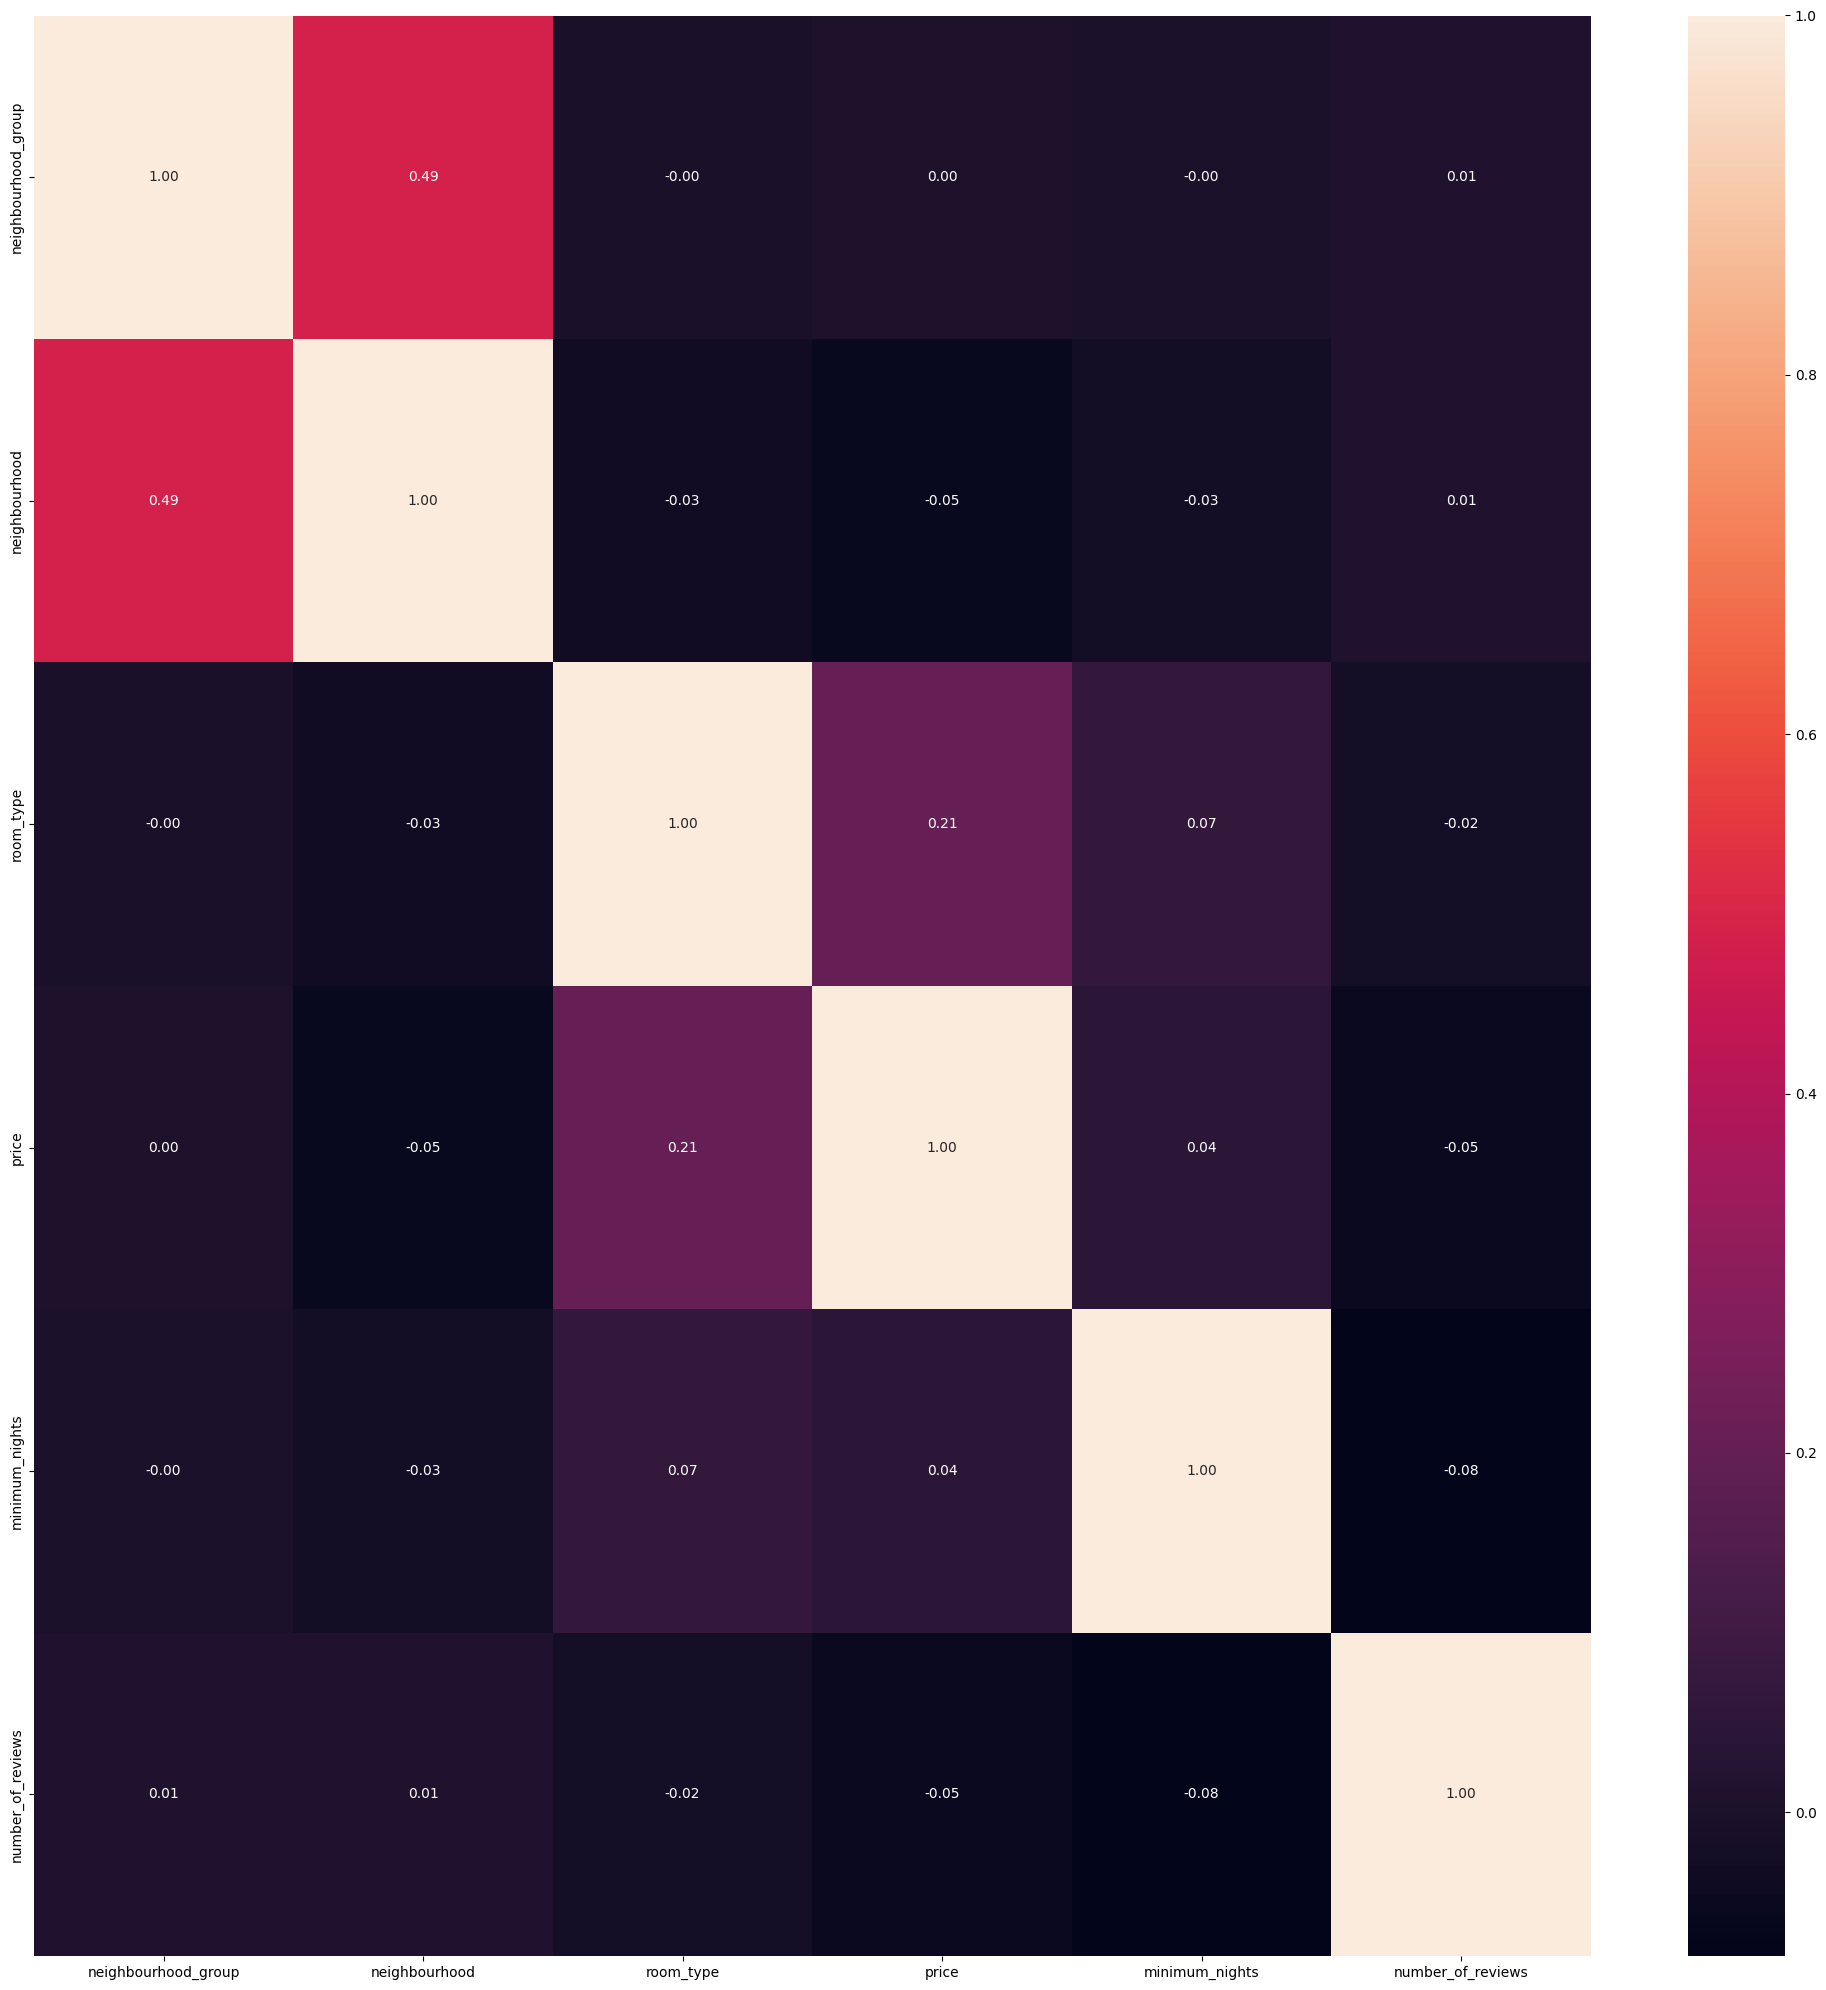

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

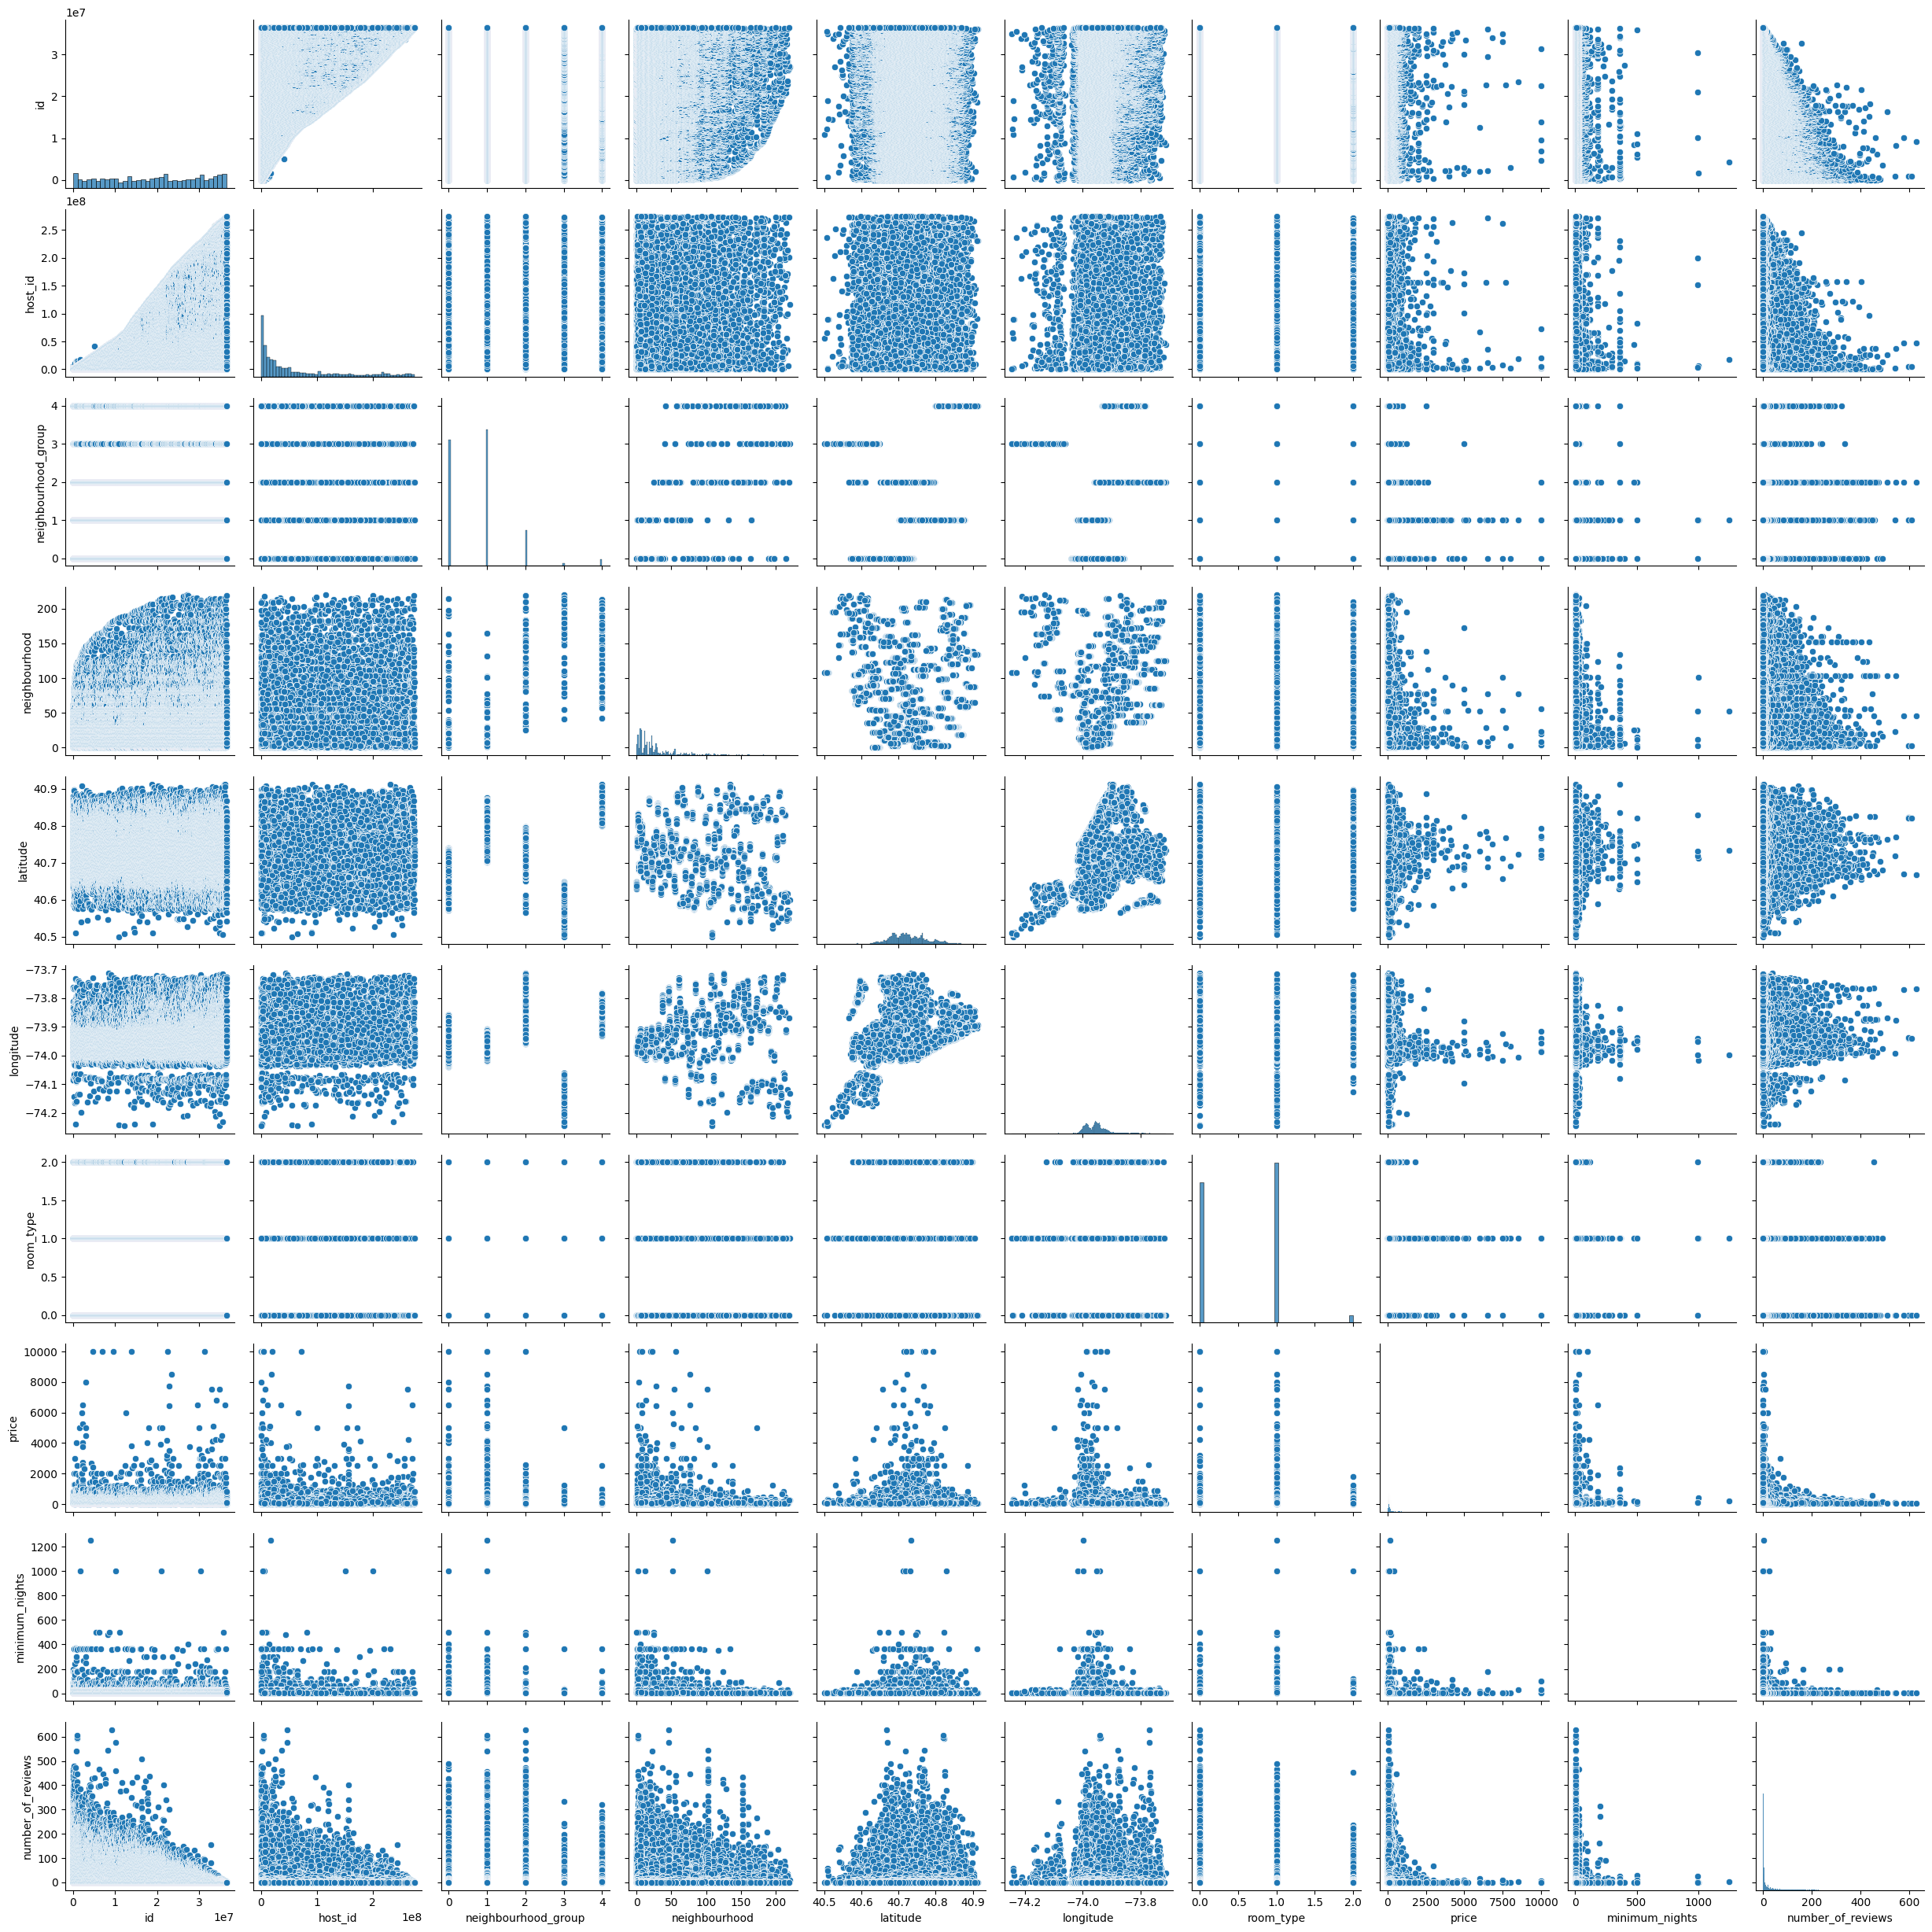

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data = total_data)


In [11]:
total_data.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466
std,1.098311e+07,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582
min,2.539000e+03,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000
50%,1.967728e+07,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000
75%,2.915218e+07,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000
max,3.648724e+07,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000


In [12]:
total_data2 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


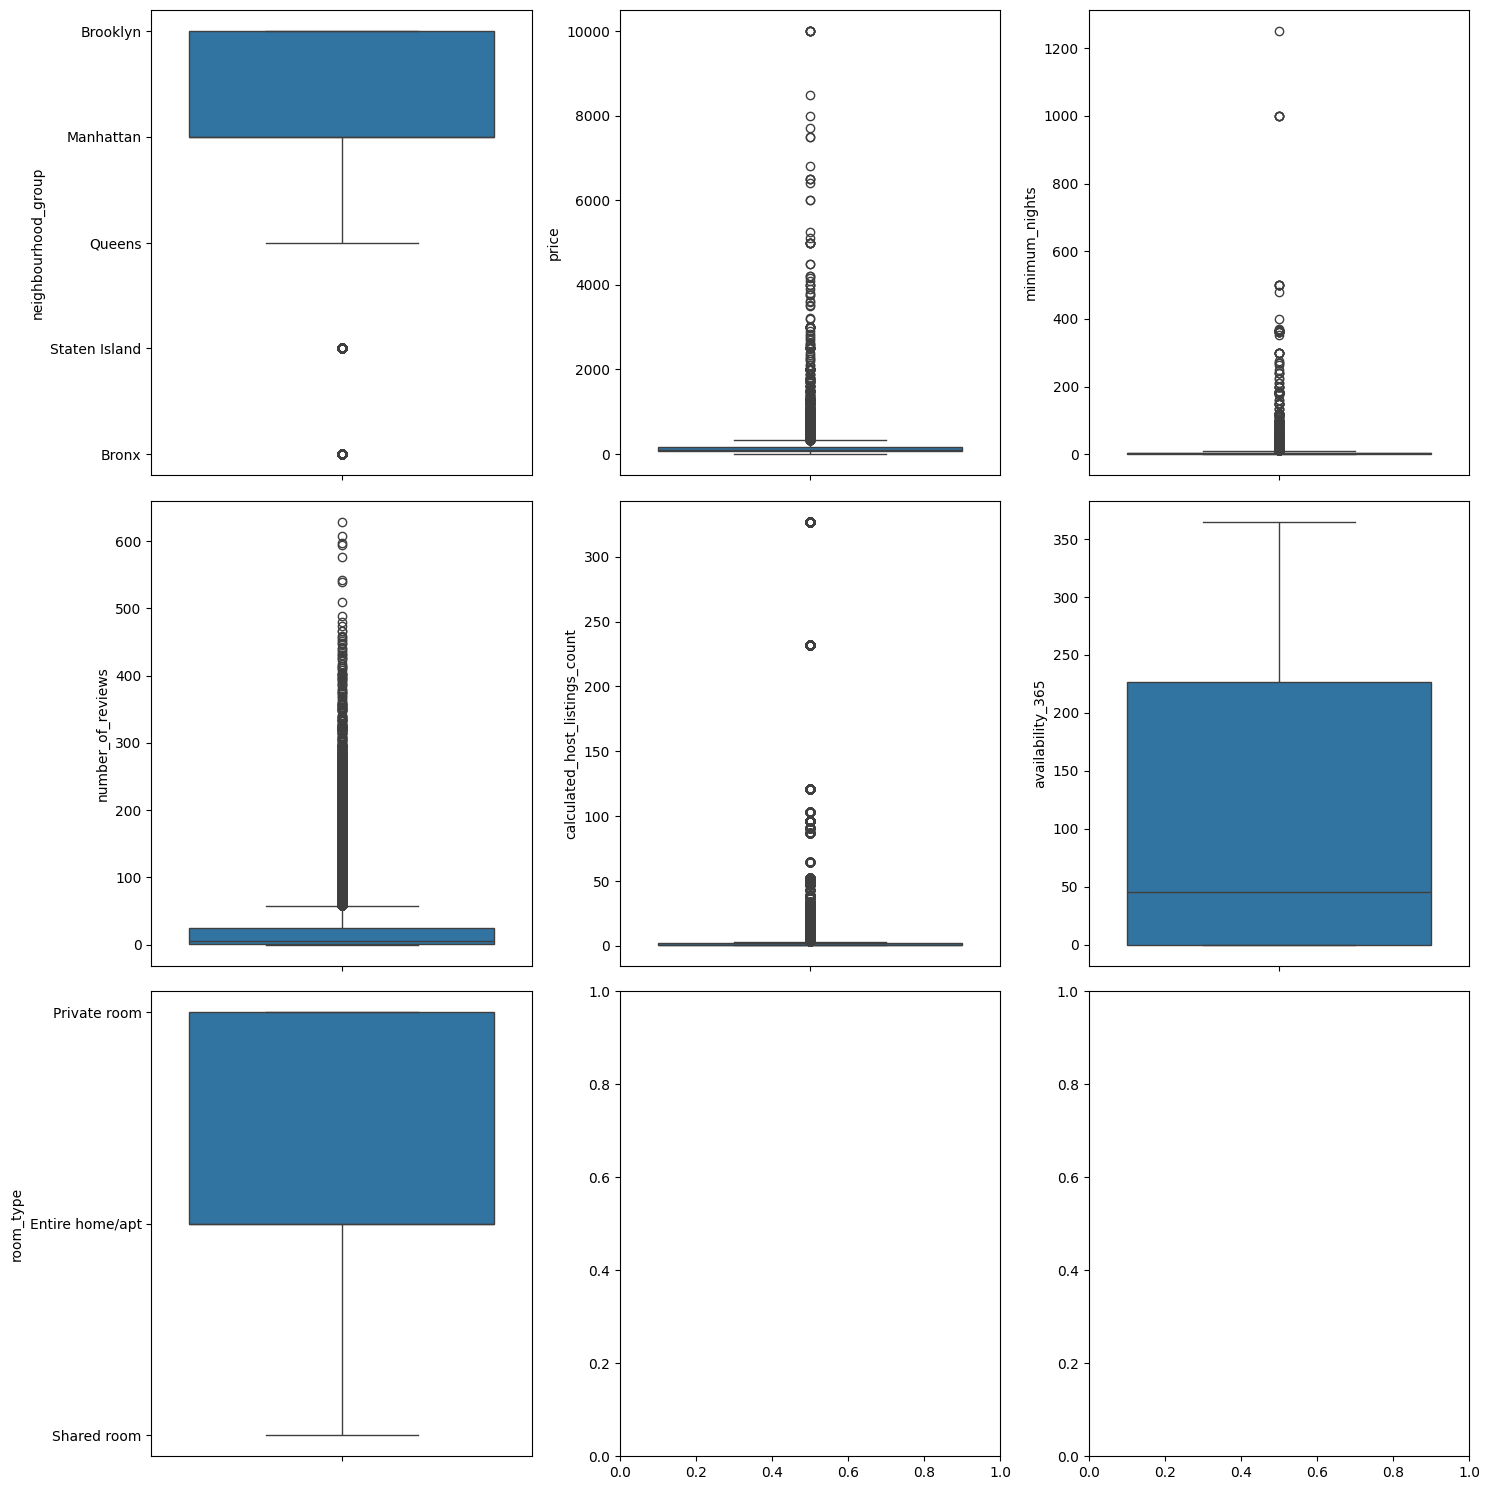

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data2, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data2, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data2, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data2, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data2, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data2, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data2, y = "room_type")

plt.tight_layout()

plt.show()

In [14]:
stats_price = total_data2["price"].describe()

price_iqr = stats_price["75%"] - stats_price["25%"]
upper_limit = stats_price["75%"] + 1.5 * price_iqr
lower_limit = stats_price["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [15]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [16]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)} con un rango intercuartílico de  {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0 con un rango intercuartílico de  4.0


In [17]:
total_data2 = total_data2[total_data2["minimum_nights"] <= 15]

In [18]:
count_0 = total_data2[total_data2["minimum_nights"] == 0].shape[0]
count_1 = total_data2[total_data2["minimum_nights"] == 1].shape[0]
count_2 = total_data2[total_data2["minimum_nights"] == 2].shape[0]
count_3 = total_data2[total_data2["minimum_nights"] == 3].shape[0]
count_4 = total_data2[total_data2["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12720
Count of 2:  11696
Count of 3:  7999
Count of 4:  3303


In [19]:
hostlist_stats = total_data2["calculated_host_listings_count"].describe()
hostlist_stats

count    43274.000000
mean         3.369414
std         21.719448
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [20]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)} con un rango intercuartílico de  {round(hostlist_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5 con un rango intercuartílico de  1.0


In [21]:
count_04 = sum(1 for x in total_data2["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data2[total_data2["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data2[total_data2["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40313
Count of 1:  30255
Count of 2:  6180


In [22]:
total_data2 = total_data2[total_data2["calculated_host_listings_count"] > 4]

In [23]:
total_data2.isnull().sum().sort_values(ascending = False)

last_review                       442
reviews_per_month                 442
name                                1
id                                  0
neighbourhood_group                 0
neighbourhood                       0
host_id                             0
host_name                           0
longitude                           0
latitude                            0
room_type                           0
price                               0
number_of_reviews                   0
minimum_nights                      0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [25]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data2[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data2.index, columns = num_variables)
df_scal["price"] = total_data2["price"]
df_scal.head()

ValueError: could not convert string to float: 'Brooklyn'